# Brief summary of the software

#### Initial value problems
Code is capable of soliving initial value problems using huen, Heun, and Runge-Kutta methods. Comparing the errors of the methods against computational cost.

Consider the following initial value problem:

$x'(t) = x(t)$, with $x(0) = 1$ and calculate $x(1)$.

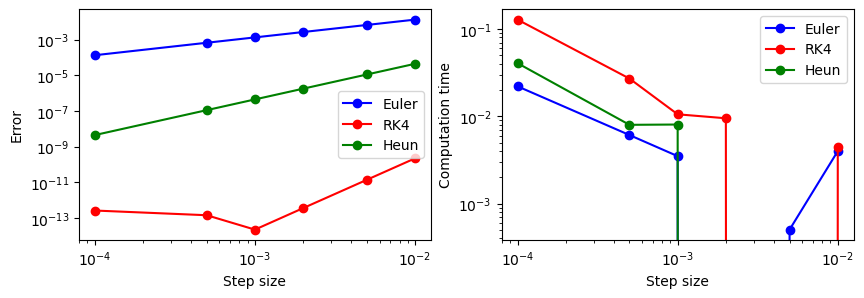

_________________________________________________________________________
Comparison of computation times and errors for a fixed step size (0.001):
Method:| Computation time (mag):| Error (mag):
-------|------------------------|-------------
Euler  |                   -2.46|       -2.87
RK4    |                   -1.98|      -13.64
Heun   |                   -2.09|       -6.34
_________________________________________________________________________
Comparison of step size required to achieve a fixed magnitude error (-5):
Method:| Step size (mag):
-------|-----------------
Euler  |            -6.00
RK4    |            -1.00
Heun   |            -3.00


c:\Users\duppu\Documents\EMAT3008-ScientificComputing\Helpers\plotting.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [1]:
from Helpers.plotting import run_comparison_diagnostics
import numpy as np

# Define ODE
ode = lambda t, y: y
ode_analytical = lambda t: np.exp(t)
t0 = 0
y0 = np.array([1])
tf = 1
# COMPARISON OF EFFECT OF STEP SIZE
deltas = [0.01, 0.005, 0.002, 0.001, 0.0005, 0.0001]
methods = ['Euler', 'RK4', 'Heun']

run_comparison_diagnostics(ode, ode_analytical, t0, y0, tf, deltas, methods)

As can be seen from the graphs and diagnostic tables, the Euler method is the least accurate, but also the fastest. The Heun method is more accurate, but slower. The Runge-Kutta method is the most accurate, but also the slowest. However, the difference in magnitude of the error between RK4 and Heun is so much larger than the difference in computational cost that it is worth using RK4. As such, it has been set as the default method in the code. It can also be seen that with a step size lower than 0.001, the error begins to increase not decrease. It is likely that this is due to a truncation or rounding error from the computer's finite precision. This is not the case for the other methods, which continue to decrease in error as the step size decreases. As such, a warning has been put in for the runga kutta method. The user can choose to use Heun or Euler if they wish. For less complicated problems, Euler may be sufficient.

### Second order problems

An additional error experienced by Euler is increased inaccuracy as the integral moves further forward in time for non first order problems. This is due to the fact that the Euler method is a first order method, and so the error increases as the integral moves further forward in time. This is not the case for RK4, which is a fourth order method. A demonstration of this can be seen in the following problem:

Consider the following initial value problem:
    $x''(t) = -x(t)$, with $x(0) = 0$ and $x'(0) = 1$ and calculate $x(20)$.

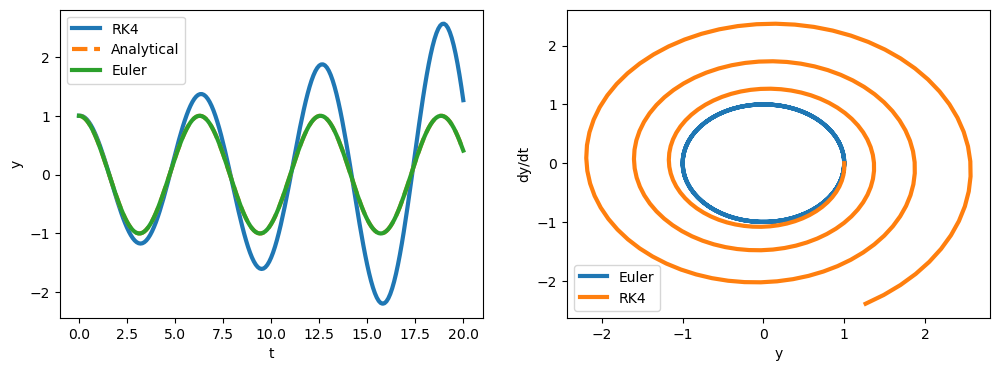

In [2]:
from Helpers.solvers import solve_to
from Helpers.plotting import visualise_rk4_vs_euler

# Define ODE
def ode(t, y):
    y_ = y[0]
    x_ = y[1]
    return np.array([x_, -y_])

# Initial conditions
t0 = 0
y0 = np.array([1, 0])

# Define time interval and step size
tf = 20
deltat_max = 0.1

# Solve ODE
t_euler, y_euler = solve_to(ode, t0, y0, tf=tf, method='Euler', deltat_max=deltat_max)
t_rk4, y_rk4 = solve_to(ode, t0, y0, tf=tf, method='RK4', deltat_max=deltat_max)

# Analytical solution
def ode_analytical(t):
    return np.cos(t)
     
y_a = ode_analytical(t_rk4)

# Plot results
visualise_rk4_vs_euler(t_euler, y_euler, t_rk4, y_rk4, y_a)

#### Periodic orbits and numerical continuation
Experimenting with the predator prey equations:
$$
\frac{dx}{dt} = x(1-x) - \frac{axy}{d+x} \\
\frac{dy}{dt} = by(1 - \frac{y}{x})
$$
for a=1, d=0.1, and the value of b is varied between 0.1 and 0.5. It can be seen in the plots below that when b is greater than a threshold point, a periodic orbit can be found. 

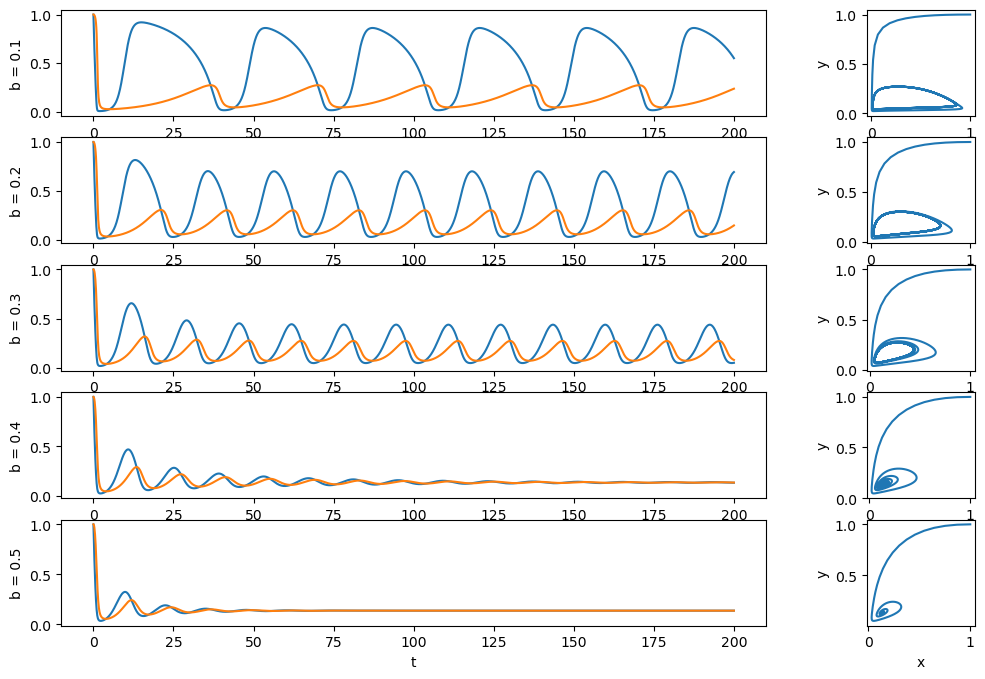

In [3]:
from Helpers.plotting import plot_time_series

# Define ODE
def fun(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)])
t0 = 0
y0 = np.array([1, 1])
tf = 200
deltat_max = 0.1

# Solve ODE
timeSeries = []
b_args = [0.1, 0.2, 0.3, 0.4, 0.5]
for b in b_args:
    timeSeries.append(solve_to(fun, t0, y0, tf=tf, method='RK4', deltat_max=deltat_max, args=(1.5, 0.1, b)))

plot_time_series(timeSeries, b_args)

The time period of the periodic orbit, T, is introduced as an additional variable to be solved. The equations used to solve for T are the starting conditions for the variables involved and the derivative value. All of these equal the same value at the start and end of the periodic orbit. The period can be calculated and the 2D phase plane plotted as demonstrated in the code snippet below.

Initial condition: [0.8189695113270199, 0.16636149972895542]. Period: 34.06739419385612


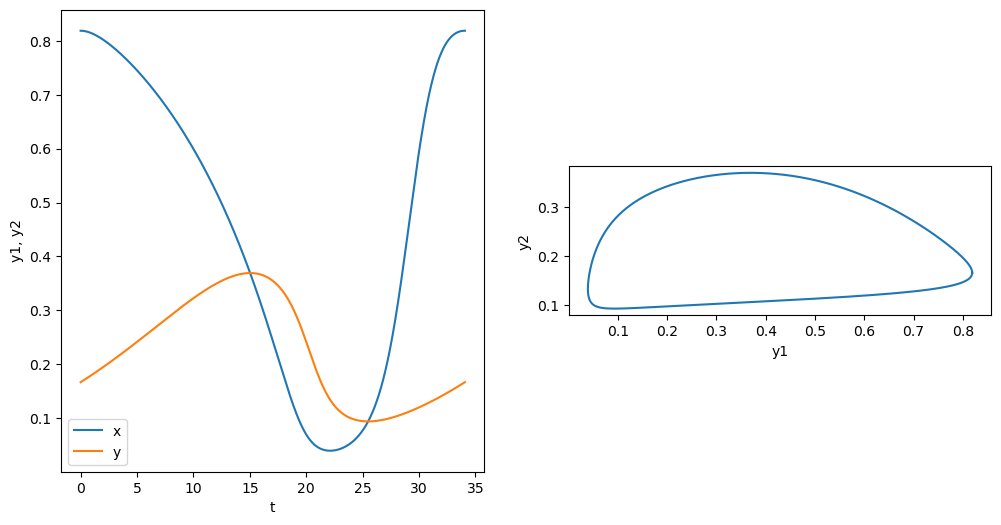

In [4]:
from Helpers.solvers import shooting
from Helpers.plotting import plot_phase_plane_2D

# Define ODE
def ode(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    dxdt = x*(1-x) - (a*x*y)/(d+x)
    dydt = b*y*(1 - y/x)
    return np.array([dxdt, dydt])


# Define the phase function and the condition
def phase_function(t, y):
    dx, dy = ode(t, y)
    return dx

# Initial guess
U0 = np.array([0.6, 0.8, 35])               # [x0, y0, T]
X0, T = shooting(U0, ode, phase_function)
print('Initial condition: [{}, {}]. Period: {}'.format(X0[0], X0[1], T))
t, y = solve_to(ode, 0, X0, tf=T, n_max=None, method='RK4', deltat_max=0.01)

plot_phase_plane_2D(t, y)

## Key software design decisions

### Function handlers


## Reflective learning log

### Exploring Scipy Functions: Enhancing Algorithm Understanding and Software Engineering Skills
During the development of my Python library for mathematical algorithms, I delved into the documentation and source code of various industry-standard libraries, specifically focusing on Scipy functions such as solve_bvp for solving boundary value problems and lstsq for addressing numerical ill-conditioning. This allowed me to not only learn more about the algorithms and their implementation but also to improve my software engineering skills by examining how to build complex classes and functions.

Previously, I had considered these libraries as black boxes, but examining their source code offered valuable insights into the core Python language and its numerous features. This knowledge has already proven beneficial in my other modules, including my dissertation. In the short-term, this deeper understanding of Scipy functions will be useful for completing this unit and enhancing my programming skills. Long-term, it will help me contribute to open-source projects or even develop my own high-quality libraries.

If I were to start the unit over again, I would begin by exploring various libraries and their source code earlier on, with a particular focus on Scipy functions such as solve_bvp and lstsq, to maximize the benefits of learning from well-designed code. In the future, I will be more proactive in studying existing libraries and their implementation, while also applying critical thinking and questioning techniques to continually improve my software engineering abilities.

### Embracing Effective Version Control: Lessons from GitHub

During this module, I gained a deeper understanding of version control using GitHub. Although I was already familiar with the platform, learning to use it correctly presented challenges. At the beginning of the module, I made the mistake of making significant changes without committing them at intermediate stages. This led me to a situation where I was stuck between two versions, with broken code in between.

I learned that it's important to commit at the end of any section of newly working code, rather than waiting for the end of the day or the end of a session. This approach not only helps in version control but also significantly improves group collaboration. High-frequency, low-content commits make it easier to integrate changes with the work of others, reducing the likelihood of merge conflicts.

In the short-term, embracing effective version control practices has helped me manage my code more efficiently, avoiding potential setbacks. In the long-term, this knowledge will be valuable for collaborative projects, where proper version control is essential for seamless integration of code and maintaining a streamlined workflow.

If I were to start the unit over again, I would focus on developing good version control habits from the beginning. In the future, I will prioritize frequent, small commits to ensure that my code is easily manageable and less prone to conflicts, both for myself and any collaborators.